In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
# from scipy.integrate import cumtrapz
# %matplotlib inline

In [2]:
# initial rocket mass(kg)
M0 = 15000
# propellant mass(Kg)
Mp = 12000
# burnout mass(Kg)
Mb = M0 - Mp
# initial height(m)
h0 = 0
# initial velocity(m/s)
u0 = 30
# equivalent velocity(m/s)
ueq = 3048
# initial time(sec)
t0 = 0
# burnout time(sec)
tb = 100    
# acceleration due to gravity(m/s^2)
g0 = 9.81
# theta from vertical
theta0 = 1*(np.pi/180)
# earth's radius (km)
Re = 6400

In [3]:
# Ratio of M0 and Mb
R = M0/Mb
# exhaust mass flow(Kg/s)
mdot = -((Mb-M0)/tb)
# Thrust (N)
Th = mdot*ueq
# initial weight (N)
W0 = M0*g0
# specific impulse
Isp = ueq/g0

In [4]:
M_old = M0
h_old = h0
u_old = u0
theta_old = theta0
t_old = t0
ux_old = 0
uy_old = 0
x_old = 0
# y_old = 0

In [5]:
#  dendity variation with height (kg/m3)
# rho = 1.2*np.exp(-2.9*pow(10,-5)*pow(h_old,1.15))
# frontal cross sectional area (m2)
Af = 1
# drag coefficient
Cd = 0.1
# drag
# D = 0.5*Cd*1.2*np.exp(-2.9*pow(10,-5)*pow(h_old,1.15))*Af*pow(u_old,2)

# g = g0*(math.pow((Re/(Re+h_old)),2))

In [6]:
M = []
h = []
u = []
theta = []
t = []
ux = []
uy = []
x = []
# y = []
M.append(M_old)
theta.append(theta_old)
u.append(u_old)
h.append(h_old)
t.append(t_old)
ux.append(ux_old)
uy.append(uy_old)
x.append(x_old)
# y.append(y_old)

while t_old < tb:
    dt = 0.1
    du = (mdot*ueq/M_old)- \
        ((0.5*Cd*1.2*np.exp(-2.9*pow(10,-5)*pow(h_old,1.15))*Af*pow(u_old,2))/M_old) -\
         g0*(math.pow((Re/(Re+h_old)),2))*np.cos(theta_old)*dt
    u_new = u_old + du

    dun = g0*(math.pow((Re/(Re+h_old)),2))*np.sin(theta_old)*dt

    dur = np.sqrt(np.power(du,2)+np.power(dun,2))

    dtheta = np.arctan(dun/u_new)
    theta_new = theta_old + dtheta

    dux = dur*np.sin(theta_new)
    ux_new = ux_old + dux
    duy = dur*np.cos(theta_new)
    uy_new = uy_old + duy

    dx = ux_new*dt
    x_new = x_old + dx
    dy = uy_new*dt
    h_new = h_old + dy

    dm = -mdot*dt
    M_new = M_old + dm

    u.append(u_new)
    theta.append(theta_new)
    ux.append(ux_new)
    uy.append(uy_new)
    x.append(x_new)
    h.append(h_new)
    
    t_new = t_old + dt
    # print(t_new)
    t.append(t_new)
    theta_old = theta_new
    M_old = M_new
    ux_old = ux_new
    uy_old = uy_new
    u_old = u_new
    x_old = x_new
    h_old = h_new
    t_old = t_new

## Burnout Velocity

In [7]:
ub = ueq*np.log(R)-(g0*(math.pow((Re/(Re+h_old)),2)))*tb
print(f"Burnout Velocity is {ub} m/s.")

Burnout Velocity is 4905.55399548226 m/s.


## Burnout Height

In [8]:
hb = ueq*tb*(1-(np.log(R)/(R-1))) - (g0*(math.pow((Re/(Re+h_old)),2)))*(np.power(tb,2)/2)
print(f"Burnout Height is {hb} m.")

Burnout Height is 182160.19299167767 m.


## Burnout Theta

In [9]:
theta_b = theta[100]
print(f"Burnout Theta is {theta_b} rad.")

Burnout Theta is 0.019996465979008154 rad.


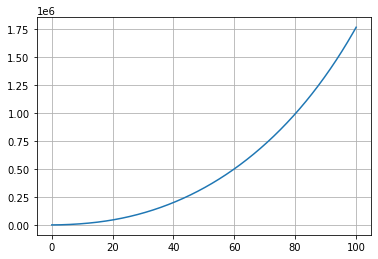

In [10]:
plt.grid();
plt.plot(t,h);

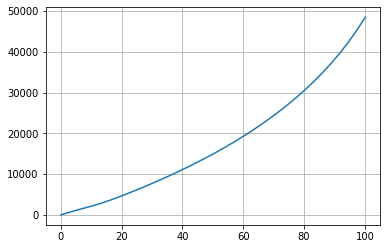

In [11]:
plt.grid();
plt.plot(t,u);

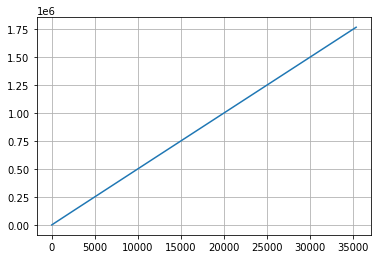

In [12]:
plt.grid();
plt.plot(x,h);

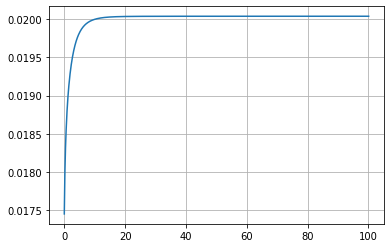

In [13]:
plt.grid();
plt.plot(t,theta);